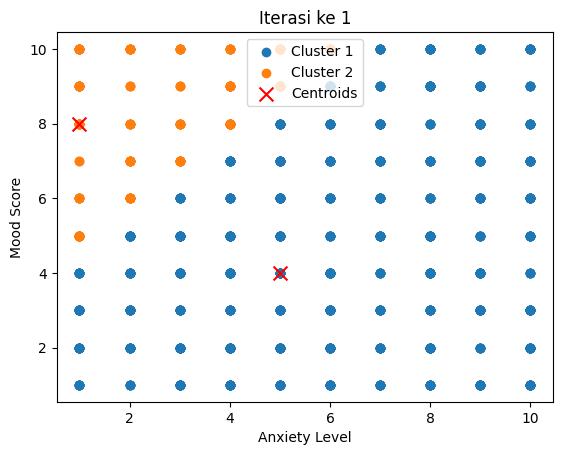

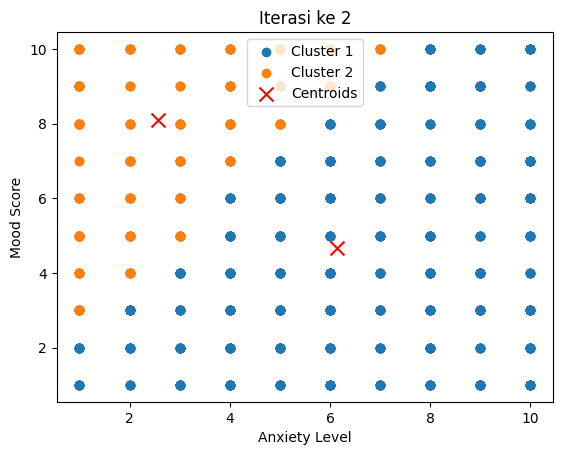

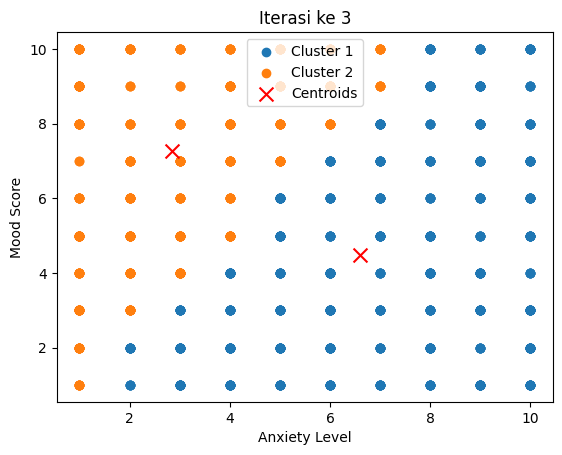

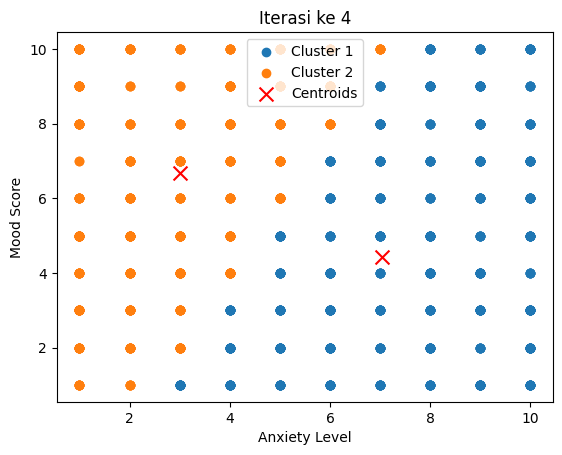

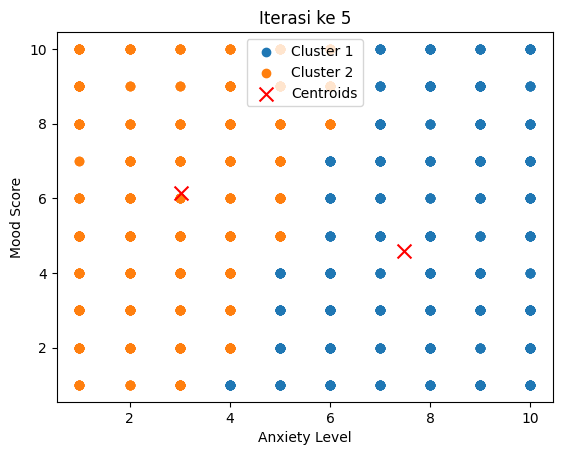

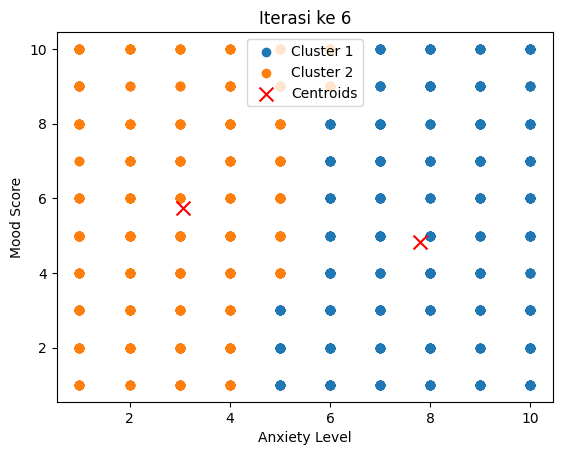

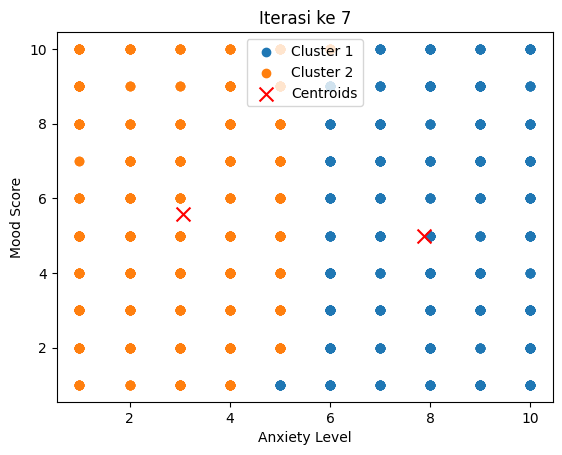

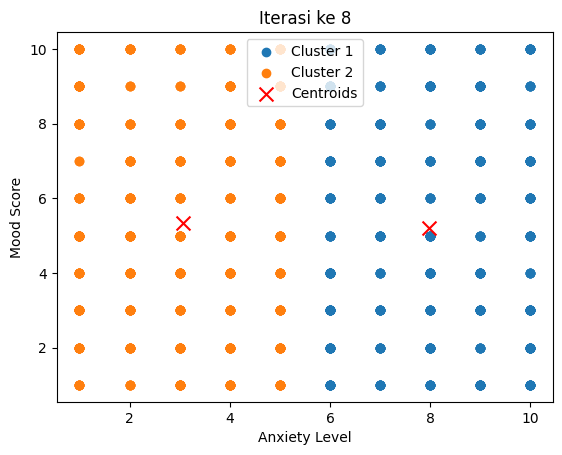

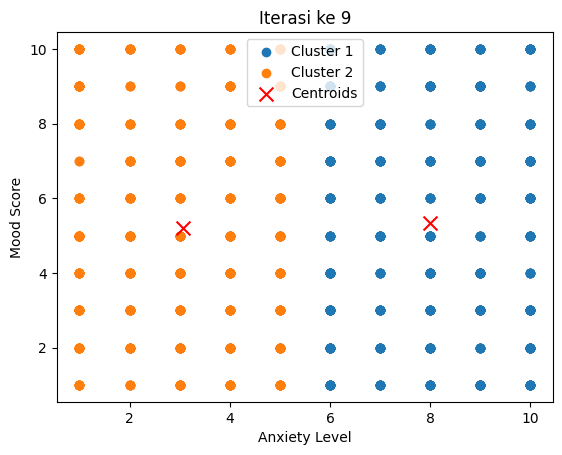

Selesai !!
Total Iterasi: 9
Waktu eksekusi: 2.10 detik
Cluster 1: 495
Cluster 2: 504


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import time

start_time = time.time()

# File dataset
file_path: str = "student-monitoring.csv"

# Panggil file dataset dan ubah menjadi Dataframe
# Atau lebih dikenal, struktur data pada pandas
df: pd.DataFrame = pd.read_csv(
  filepath_or_buffer=file_path,
  sep=","
)

# Isi missing value di kolom
# - Anxiety Level
# - Mood Score
# dengan rata-rata dari kolom 'Stress Level (GSR)' dan 'Sleep Hours'

def fill_missing_with_regression(df, target_col, feature_cols):
    train = df[df[target_col].notnull()]
    test = df[df[target_col].isnull()]

    if not train.empty and not test.empty:
      model = LinearRegression()
      model.fit(train[feature_cols], train[target_col])
      df.loc[df[target_col].isnull(), target_col] = model.predict(test[feature_cols]).astype(int)
      
    return df

ColStressLevel: str   = 'Stress Level (GSR)'
ColSleepHours: str    = 'Sleep Hours'
ColAnxietyLevel: str  = 'Anxiety Level'
ColMoodScore: str     = 'Mood Score'

predictor_cols = [ColStressLevel, ColSleepHours]

df = fill_missing_with_regression(df, ColAnxietyLevel, predictor_cols)
df = fill_missing_with_regression(df, ColMoodScore, predictor_cols)

data: np.ndarray = df[[ColAnxietyLevel, ColMoodScore]].values

initial_centoids: np.ndarray = np.array([
  [5, 4], [1, 8]
])

def euclidean_distance(x: np.ndarray, y: np.ndarray) -> np.ndarray:
  """
  Hitung Euclidean Distance dari dua titik.
  Rumus: sqrt((x1 - x2)^2 + (y1 - y2)^2)
  """
  return np.sqrt(((x - y) ** 2).sum(axis=1))

def kmeans(data: np.ndarray, k: int, max_iters: int = 100) -> np.ndarray:
  """
  K-Means Clustering
  
  Lakukan iterasi k-means dengan metode Manhattan Distance
  """
  
  centroids: np.ndarray = initial_centoids
  
  history: np.ndarray | list | any = []
  prev_cluster: np.ndarray | list | any = None
  cluster: np.ndarray | list | any = None
  
  for _ in range(max_iters):
    # Kalkulasi jarak Manhattan dan tentukan cluster
    distances: np.ndarray | any = np.array([
      euclidean_distance(data, centroid) for centroid in centroids
    ])
    
    cluster: np.ndarray | list | any = np.argmin(distances, axis=0)
    
    history.append(
      (centroids.copy(), cluster.copy())
    )
    
    # Cek apakah cluster berhenti berubah
    if np.all(prev_cluster == cluster):
      break
    
    prev_cluster = cluster.copy()
    
    # Perbarui centoids
    centroids = np.array(
      [data[cluster == i].mean(axis=0) for i in range(k)]
    )
  
  return history, cluster

# Jumlah cluster (k)
k: int = 2

history, final_cluster = kmeans(data, k, max_iters=100)

# Visualisasikan cluster pada setiap iterasi
for i, (centroids, clusters) in enumerate(history):
  plt.figure()
  plt.title(f"Iterasi ke {i + 1}")
  
  for j in range(k):
    plt.scatter(
      data[clusters == j, 0],
      data[clusters == j, 1],
      label=f"Cluster {j + 1}"
    )
  
  plt.scatter(
    centroids[:, 0],
    centroids[:, 1],
    marker="x",
    color="red",
    s=100,
    label="Centroids"
  )
  
  plt.xlabel(ColAnxietyLevel)
  plt.ylabel(ColMoodScore)
  plt.legend()
  plt.show()

# Tambahkan kolom 'Cluster'
# Isi dengan cluster terakhir dari iterasi K-Means
df['Cluster'] = [final_cluster[i] + 1 for i in range(len(final_cluster))]

cluster_1 = df['Cluster'] == 1
cluster_2 = df['Cluster'] == 2

# Buat file 'student-monitoring_clustered.csv' dari DataFrame hasil klasterisasi
df.to_csv(
  path_or_buf="student-monitoring_clustered.csv",
  index=False,
  sep=","
)
end_time = time.time()
duration = end_time - start_time

print("Selesai !!")
print("Total Iterasi:", len(history))
print(f"Waktu eksekusi: {duration:.2f} detik")
print(f"Cluster 1: {cluster_1.sum()}")
print(f"Cluster 2: {cluster_2.sum()}")
